In [1]:
import numpy as np
import pandas as pd
import matplotlib

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
matplotlib.rc('text', usetex=True)
matplotlib.rcParams.update({"font.size":16})
import os
import sys

sys.path.append(os.path.abspath('../..'))
from modules import io

In [2]:
MESH = 'fine'
CASE_DIR = "/home/marsdenlab/projects/SV/UQ/data/2_vessel_data/data/"+MESH

CSV_FILES = [
    'aorta_center',
    'right_iliac_center'
]

LABELS = [
    "pressure_00400_0",
    "velocity_00400_0",
    "velocity_00400_1",
    "velocity_00400_2",
    "velocity_magnitude"
]

OUT_DIR = "/home/marsdenlab/projects/SV/UQ/data/2_vessel_data/plots/"+MESH

dataframes = []

for fn in CSV_FILES:
    df = pd.read_csv(CASE_DIR+'/'+fn+'.csv')
    
    df['velocity_magnitude'] = (df['velocity_00400_0']**2+\
        df['velocity_00400_1']**2+\
        df['velocity_00400_2']**2)**0.5
    
    dataframes.append(df)
    
MODEL_IDS = dataframes[0]['model'].unique()

No handles with labels found to put in legend.


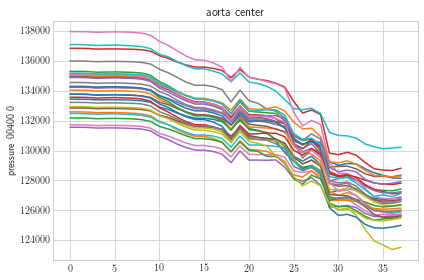

No handles with labels found to put in legend.


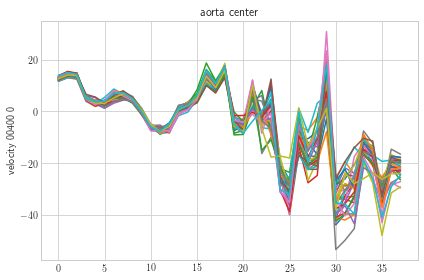

No handles with labels found to put in legend.


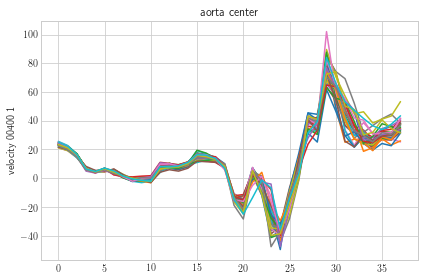

No handles with labels found to put in legend.


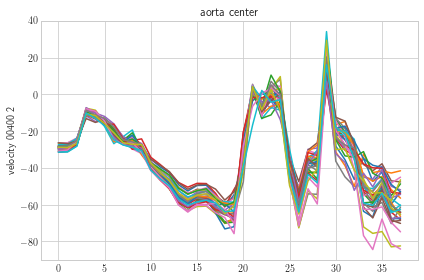

No handles with labels found to put in legend.


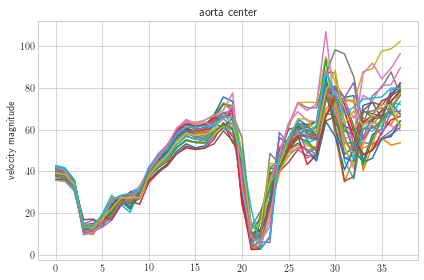

No handles with labels found to put in legend.


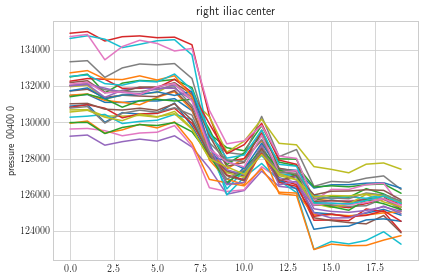

No handles with labels found to put in legend.


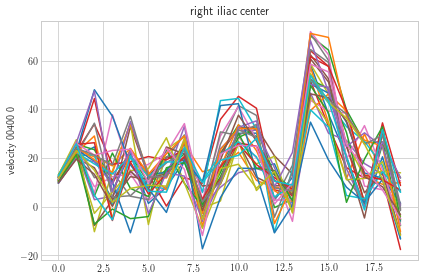

No handles with labels found to put in legend.


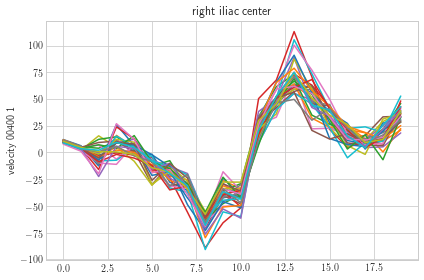

No handles with labels found to put in legend.


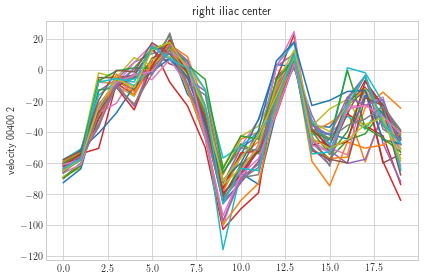

No handles with labels found to put in legend.


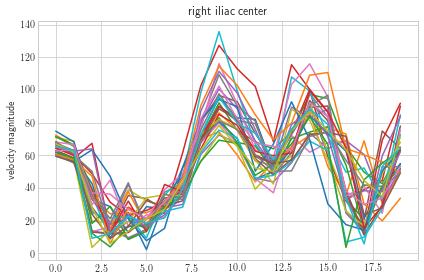

In [3]:
for i,fn in enumerate(CSV_FILES):
    df = dataframes[i]
    
    for l in LABELS:
        xlab = l.replace('_',' ')
        lab = fn.replace('_',' ')
        
        plt.figure()
        
        for m in MODEL_IDS:
            d = df.loc[df['model']==m]
            plt.plot(d['point'],d[l])
        plt.title(lab)
        plt.ylabel(xlab)
        plt.legend()
        plt.tight_layout()
        plt.savefig(OUT_DIR+'/'+fn+'_'+l+'.png', dpi=300)
        plt.show()